**Extracting table from a website and analyzing its data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://www.bbc.com/sport/cricket/county-championship-division-one/table'
df = pd.read_html(url)
df[0]

,Unnamed: 0,Team,P,W,L,D,Ba,Bo,Pts,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Surrey,8,5,1,2,15,24,129,NaN,NaN,NaN
1,2,Essex,8,3,1,4,17,21,106,NaN,NaN,NaN
2,3,Hampshire,8,4,3,1,12,22,103,NaN,NaN,NaN
3,4,Warks,7,3,2,2,15,20,93,NaN,NaN,NaN
4,5,Somerset,8,2,2,4,14,22,88,NaN,NaN,NaN
5,6,Lancashire,7,2,0,5,12,19,87,NaN,NaN,NaN
6,7,Notts,8,2,3,3,8,23,78,NaN,NaN,NaN
7,8,Kent,8,2,4,2,10,20,72,NaN,NaN,NaN
8,9,Middlesex,7,2,5,0,1,19,51,NaN,NaN,NaN
9,10,Northants,7,1,5,1,1,17,39,NaN,NaN,NaN


In [3]:
df[0].index

RangeIndex(start=0, stop=11, step=1)

In [4]:
df[0].drop(['Unnamed: 0','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis = 1, inplace = True)

In [5]:
df[0].drop(df[0].index[-1], inplace = True)

In [6]:
table = df[0]
table.dtypes

Team    object
P       object
W       object
L       object
D       object
Ba      object
Bo      object
Pts     object
dtype: object

In [7]:
table = table.astype({'P':'int', 'W':'int', 'L':'int', 'D':'int', 'Ba':'int', 'Bo':'int', 'Pts':'int'})

In [8]:
table.set_index('Team')

,P,W,L,D,Ba,Bo,Pts
Team,,,,,,,
Surrey,8,5,1,2,15,24,129
Essex,8,3,1,4,17,21,106
Hampshire,8,4,3,1,12,22,103
Warks,7,3,2,2,15,20,93
Somerset,8,2,2,4,14,22,88
Lancashire,7,2,0,5,12,19,87
Notts,8,2,3,3,8,23,78
Kent,8,2,4,2,10,20,72
Middlesex,7,2,5,0,1,19,51


In [9]:
table

,Team,P,W,L,D,Ba,Bo,Pts
0,Surrey,8,5,1,2,15,24,129
1,Essex,8,3,1,4,17,21,106
2,Hampshire,8,4,3,1,12,22,103
3,Warks,7,3,2,2,15,20,93
4,Somerset,8,2,2,4,14,22,88
5,Lancashire,7,2,0,5,12,19,87
6,Notts,8,2,3,3,8,23,78
7,Kent,8,2,4,2,10,20,72
8,Middlesex,7,2,5,0,1,19,51
9,Northants,7,1,5,1,1,17,39


In [10]:
table.describe()

,P,W,L,D,Ba,Bo,Pts
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.600000,2.600000,2.600000,2.400000,10.500000,20.700000,84.600000
std,0.516398,1.173788,1.712698,1.577621,5.642104,2.110819,26.386865
min,7.000000,1.000000,0.000000,0.000000,1.000000,17.000000,39.000000
25%,7.000000,2.000000,1.250000,1.250000,8.500000,19.250000,73.500000
50%,8.000000,2.000000,2.500000,2.000000,12.000000,20.500000,87.500000
75%,8.000000,3.000000,3.750000,3.750000,14.750000,22.000000,100.500000
max,8.000000,5.000000,5.000000,5.000000,17.000000,24.000000,129.000000


**Match stats for each team**

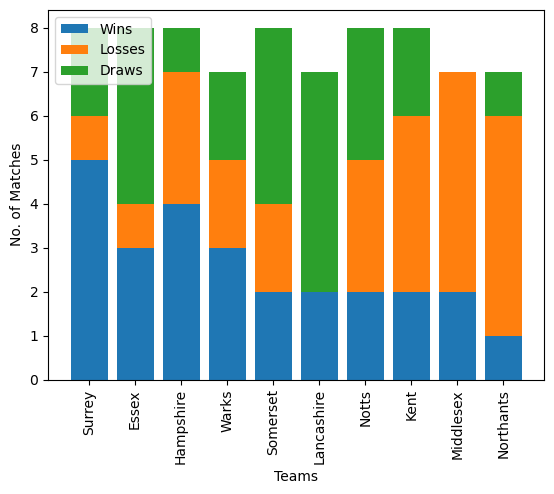

In [11]:
fig, ax = plt.subplots()
ax.bar(table['Team'], table['W'], label = 'Wins')
ax.bar(table['Team'], table['L'], bottom = table['W'], label = 'Losses')
ax.bar(table['Team'], table['D'], bottom = np.add(list(table['W']), list(table['L'])), label = 'Draws')
ax.legend()
ax.set_xlabel('Teams')
ax.set_ylabel('No. of Matches')
plt.xticks(rotation = 'vertical')
plt.show()

**Points obatined by Teams**

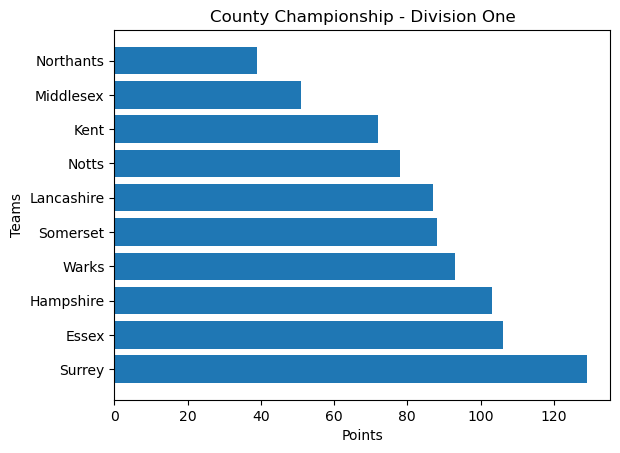

In [12]:
plt.barh(table['Team'], table['Pts'])
plt.title('County Championship - Division One')
plt.xlabel('Points')
plt.ylabel('Teams')
plt.show()

**Comparison of Batting and Bowling by Teams**

In [13]:
bat_bowl = table[['Team','Ba','Bo']]
bat_bowl.set_index('Team')

,Ba,Bo
Team,,
Surrey,15,24
Essex,17,21
Hampshire,12,22
Warks,15,20
Somerset,14,22
Lancashire,12,19
Notts,8,23
Kent,10,20
Middlesex,1,19


Text(0.5, 0, 'Teams')

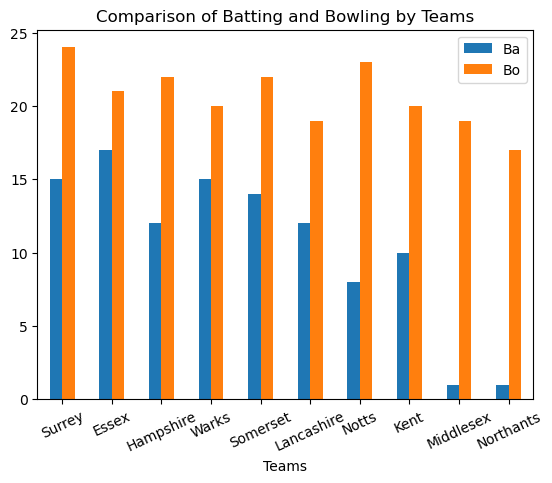

In [14]:
ax = bat_bowl.plot.bar(x = 'Team', rot=25)
plt.title('Comparison of Batting and Bowling by Teams')
plt.xlabel('Teams')

**Relation between Variables**

In [15]:
table.corr()

/tmp/ipykernel_33/3415999624.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table.corr()


,P,W,L,D,Ba,Bo,Pts
P,1.000000,0.439941,-0.201008,0.218218,0.495764,0.795091,0.557752
W,0.439941,1.000000,-0.475320,-0.084003,0.620767,0.708556,0.880349
L,-0.201008,-0.475320,1.000000,-0.797766,-0.839380,-0.436430,-0.790688
D,0.218218,-0.084003,-0.797766,1.000000,0.611660,0.206869,0.385954
Ba,0.495764,0.620767,-0.839380,0.611660,1.000000,0.592433,0.891860
Bo,0.795091,0.708556,-0.436430,0.206869,0.592433,1.000000,0.779603
Pts,0.557752,0.880349,-0.790688,0.385954,0.891860,0.779603,1.000000


**Scatter plot between Points and Matches Won**

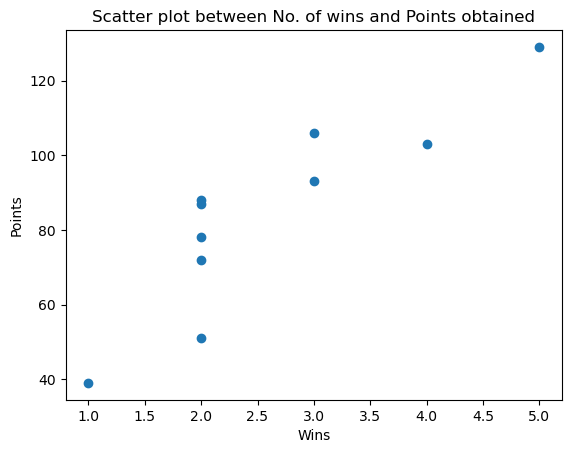

In [16]:
plt.scatter(table['W'], table['Pts'])
plt.xlabel('Wins')
plt.ylabel('Points')
plt.title('Scatter plot between No. of wins and Points obtained')
plt.show()

In [24]:
x = table['W']
y = table['Pts']
fit = np.polyfit(x, y, deg=1)
fit

array([19.79032258, 33.14516129])

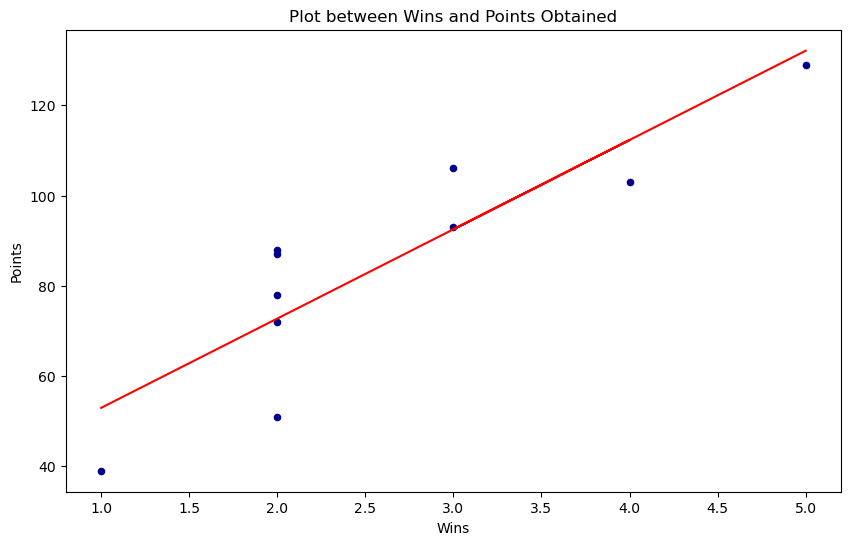

'Points = 20 * No. of wins + 33'

In [25]:
table.plot(kind='scatter', x='W', y='Pts', figsize=(10, 6), color='darkblue')

plt.title('Plot between Wins and Points Obtained')
plt.xlabel('Wins')
plt.ylabel('Points')

# add the line to the plot
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Points = {0:.0f} * No. of wins + {1:.0f}'.format(fit[0], fit[1])

The relation between number of matches won and points obtained can be inferred to be linear as the points obtained increases with number of matches won.

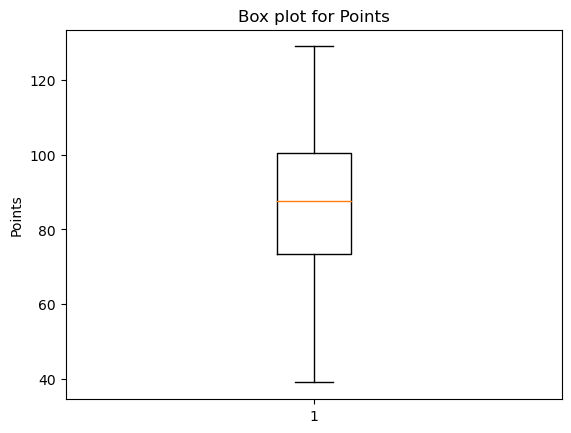

In [17]:
plt.boxplot(table['Pts'])
plt.title('Box plot for Points')
plt.ylabel('Points')
plt.show()

In [18]:
table.to_csv('cricket.csv', index = False)

Link to interactive Dashboard: [Dashboard](https://dataplatform.cloud.ibm.com/dashboards/898876a4-8fe8-41b9-9fe3-887d955c02b8/view/7c69a7253a9b0fe355e3f6e407c82f037a63265ce7bb865782d37b4959322797f06d1bc3c82d4f0cde440330f1b815519b)